In [16]:
# Import Dependencies
import pandas as pd
from matplotlib import pyplot
from fbprophet import Prophet
from pandas import to_datetime
from pandas import DataFrame
import datetime as dt

In [17]:
# Read the dataset
sales_df = pd.read_csv("Sales_Data - Only the columns we need.csv")
sales_df.head()

,YEAR_,MONTH_,InvDate,InvNumber,Market,InvCustomer,CompanyName,ItemClass,SubCategory,Flavours,Product,Description,Config,UOM,Real_Qty,CAD_Value
0,2013,7,07/04/2013,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,1,153.60
1,2013,7,07/04/2013,NA0223010003,CAN,SWAL01,Swalbo,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,22,2731.52
2,2013,7,07/04/2013,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,3,460.80
3,2013,7,07/04/2013,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,2,307.20
4,2013,7,07/04/2013,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,4,614.40


In [18]:
# Get to know the data types of the data in each column
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35948 entries, 0 to 35947
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR_        35948 non-null  int64  
 1   MONTH_       35948 non-null  int64  
 2   InvDate      35948 non-null  object 
 3   InvNumber    35948 non-null  object 
 4   Market       35948 non-null  object 
 5   InvCustomer  35948 non-null  object 
 6   CompanyName  35948 non-null  object 
 7   ItemClass    35948 non-null  object 
 8   SubCategory  35948 non-null  object 
 9   Flavours     35948 non-null  object 
 10  Product      35948 non-null  int64  
 11  Description  35948 non-null  object 
 12  Config       35948 non-null  object 
 13  UOM          35948 non-null  object 
 14  Real_Qty     35948 non-null  int64  
 15  CAD_Value    35948 non-null  float64
dtypes: float64(1), int64(4), object(11)
memory usage: 4.4+ MB


In [19]:
# Convert the InvDate column into datetime64 format
sales_df['InvDate'] = pd.DatetimeIndex(sales_df['InvDate'])
sales_df.head()

,YEAR_,MONTH_,InvDate,InvNumber,Market,InvCustomer,CompanyName,ItemClass,SubCategory,Flavours,Product,Description,Config,UOM,Real_Qty,CAD_Value
0,2013,7,2013-07-04,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,1,153.60
1,2013,7,2013-07-04,NA0223010003,CAN,SWAL01,Swalbo,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,22,2731.52
2,2013,7,2013-07-04,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,3,460.80
3,2013,7,2013-07-04,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,2,307.20
4,2013,7,2013-07-04,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,4,614.40


In [20]:
# Remove the data after June 30, 2019 as there is a significant deline on sales
sales_df_new = sales_df.drop(sales_df[sales_df['InvDate'] > '2019-06-30'].index)
sales_df_new.tail()

,YEAR_,MONTH_,InvDate,InvNumber,Market,InvCustomer,CompanyName,ItemClass,SubCategory,Flavours,Product,Description,Config,UOM,Real_Qty,CAD_Value
25966,2019,6,2019-06-26,NA0723001170,CAN,SWAL01,Swalbo,ORG,F&N,PEANUT,600919,NATCAN Peanut,Organic 40gx16x8,CS,2,268.18
25967,2019,6,2019-06-26,NA0723001170,CAN,SWAL01,Swalbo,ORG,F&N,CASHEW,600914,NATCAN Cashew Nut,Organic 40gx16x8,CS,4,536.36
25968,2019,6,2019-06-26,NA0723001170,CAN,SWAL01,Swalbo,ORG,GRAN,PEANUT BUTTER,600984,NATCANGRA5PK Chocolate PB,Organic 35gx5x12,CS,2,77.76
25969,2019,6,2019-06-26,NA0723001170,CAN,SWAL01,Swalbo,CONV,LSUG,PEANUT CARAMEL,600987,NATCANLS Peanut Caramel,Conventional 40gx12x8,CS,2,201.60
25970,2019,6,2019-06-26,NA0723001170,CAN,SWAL01,Swalbo,ORG,F&N,WALNUT,600911,NATCAN Walnut,Organic 40gx16x8,CS,5,670.45


In [21]:
# Add a new column month_year to groupby month
sales_df_new['month_year'] = pd.to_datetime(sales_df['InvDate']).dt.to_period('M')
sales_df_new.head()

,YEAR_,MONTH_,InvDate,InvNumber,Market,InvCustomer,CompanyName,ItemClass,SubCategory,Flavours,Product,Description,Config,UOM,Real_Qty,CAD_Value,month_year
0,2013,7,2013-07-04,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,1,153.60,2013-07
1,2013,7,2013-07-04,NA0223010003,CAN,SWAL01,Swalbo,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,22,2731.52,2013-07
2,2013,7,2013-07-04,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,CASHEW,600065,NAT CAN Cashew Nut Fiesta,Organic 40gx16x8,CS,3,460.80,2013-07
3,2013,7,2013-07-04,NA0223010005,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,2,307.20,2013-07
4,2013,7,2013-07-04,NA0223010004,CAN,CALL01,Callace & Warey,ORG,F&N,APPLE,600071,NAT CAN Niagara Apple Country,Organic 40gx16x8,CS,4,614.40,2013-07


In [22]:
# Remove the unwanted column data
sales_df_new_2 = sales_df_new.drop(["YEAR_","MONTH_","InvDate","InvNumber","Market","InvCustomer","CompanyName","ItemClass","SubCategory","Flavours","Product","Description","Config","UOM","Real_Qty"], axis=1)
sales_df_new_2.head()

,CAD_Value,month_year
0,153.60,2013-07
1,2731.52,2013-07
2,460.80,2013-07
3,307.20,2013-07
4,614.40,2013-07


In [23]:
# Rearrange the column position
sales_df_new_2 = sales_df_new_2[["month_year","CAD_Value"]]
sales_df_new_2.head()

,month_year,CAD_Value
0,2013-07,153.60
1,2013-07,2731.52
2,2013-07,460.80
3,2013-07,307.20
4,2013-07,614.40


In [24]:
# Groupby month and sum the CAD_Value i.e sales
sales_df_new_grouped = sales_df_new_2.groupby(["month_year"], as_index=False)["CAD_Value"].sum()
sales_df_new_grouped

,month_year,CAD_Value
0,2013-07,1.523696e+06
1,2013-08,2.421420e+06
2,2013-09,2.675225e+06
3,2013-10,1.920371e+06
4,2013-11,1.853762e+06
...,...,...
67,2019-02,6.160768e+05
68,2019-03,7.686584e+05
69,2019-04,1.883854e+06
70,2019-05,9.755937e+05


In [25]:
# Check the data types
sales_df_new_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   month_year  72 non-null     period[M]
 1   CAD_Value   72 non-null     float64  
dtypes: float64(1), period[M](1)
memory usage: 1.7 KB


In [26]:
# from the prophet documentation every variables should have specific names hence renaming the columns
sales_df_new_grouped = sales_df_new_grouped.rename(columns = {'month_year': 'ds',
                                'CAD_Value': 'y'})
sales_df_new_grouped.head()

,ds,y
0,2013-07,1.523696e+06
1,2013-08,2.421420e+06
2,2013-09,2.675225e+06
3,2013-10,1.920371e+06
4,2013-11,1.853762e+06


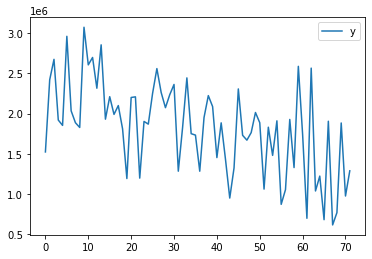

In [27]:
# Plot a time series of the existing data
sales_df_new_grouped.plot()
pyplot.show()

In [28]:
# Convert "ds" to timestamp format
sales_df_new_grouped['ds'] = sales_df_new_grouped['ds'].dt.to_timestamp('s').dt.strftime('%Y-%m')
sales_df_new_grouped.head()

,ds,y
0,2013-07,1.523696e+06
1,2013-08,2.421420e+06
2,2013-09,2.675225e+06
3,2013-10,1.920371e+06
4,2013-11,1.853762e+06


In [29]:
# Check the data types
sales_df_new_grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      72 non-null     object 
 1   y       72 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [30]:
# Initialize Prophet library
model = Prophet()

In [31]:
# Fit the data in the Prophet model
model.fit(sales_df_new_grouped)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
# Create a dataframe for the future period based on the desired future frequency
future = model.make_future_dataframe(periods=24,freq='M')
future.head()

,ds
0,2013-07-01
1,2013-08-01
2,2013-09-01
3,2013-10-01
4,2013-11-01


In [33]:
# Predict the future months using the Prophet library which analyses the seasonality trends in the dataset
forecast = model.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail() 

,ds,yhat,yhat_lower,yhat_upper
91,2021-01-31,2.996672e+05,-83645.738326,7.353915e+05
92,2021-02-28,6.660178e+05,232616.903912,1.088343e+06
93,2021-03-31,1.364345e+06,934950.313952,1.790766e+06
94,2021-04-30,3.417314e+05,-73695.811938,7.673810e+05
95,2021-05-31,1.343755e+06,899062.769720,1.792248e+06


In [34]:
#future = list()
#for i in range(1, 13):
   #date = '2019-%02d' % i
   # future.append([date])
#future = DataFrame(future)
#future.columns = ['ds']
#future['ds']= to_datetime(future['ds'])

In [35]:
#forecast = model.predict(future)
#print(forecast[['ds','yhat','yhat_lower','yhat_upper']].head())

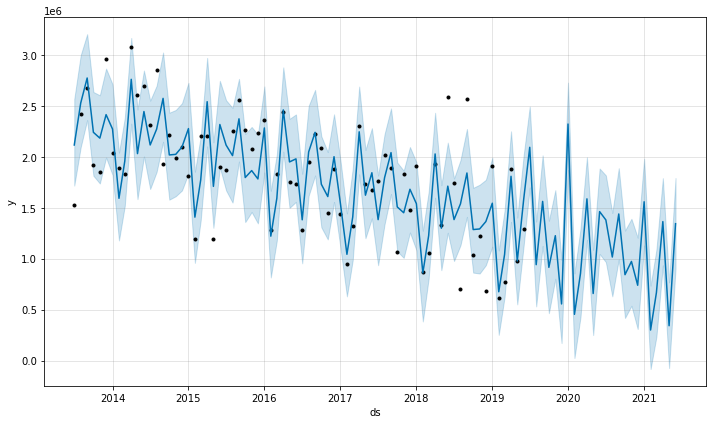

In [36]:
# Plot the predicted data. Black dots represent the actual data, blue line respresents the predicted data and blue space indicates the uncertainty which is 80% by default
fig1 = model.plot(forecast)

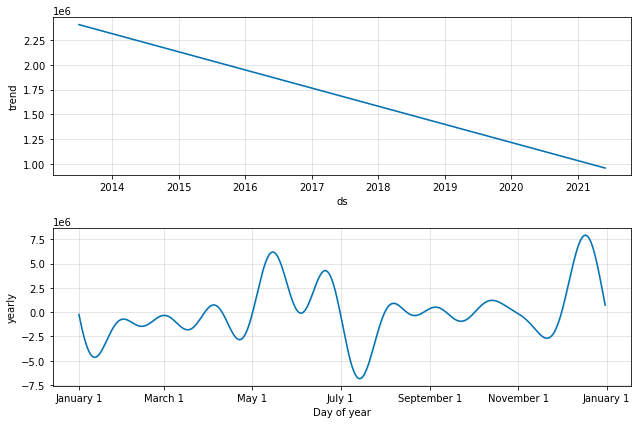

In [37]:
# Plot components for seasonality trends
fig2 = model.plot_components(forecast)

In [38]:
# Python plot for interactive graphs
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model, forecast)

ModuleNotFoundError: No module named 'prophet'

In [ ]:
# Python plot for interactive component graphs
plot_components_plotly(model, forecast)

In [ ]:
forecast[['ds','yhat']].head()